# Importing Libraries

In [1]:
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from colorama import Fore
from urllib.parse import urlparse
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from tld import get_tld, is_tld

# Load Dataset

In [2]:
data = pd.read_csv('C:\\Users\\caleb\\IT Project - ML\\phishing_site_urls.csv')
data.head()

,URL,Label
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad
3,mail.printakid.com/www.online.americanexpress....,bad
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad


# Meta information of Dataframe

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549346 entries, 0 to 549345
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   URL     549346 non-null  object
 1   Label   549346 non-null  object
dtypes: object(2)
memory usage: 8.4+ MB


# Checking for NaN values

In [4]:
data.isnull().sum()

URL      0
Label    0
dtype: int64

In [5]:
count = data.Label.value_counts()
count

good    392924
bad     156422
Name: Label, dtype: int64

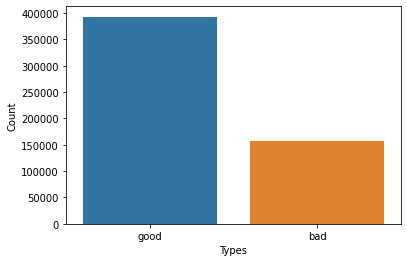

In [6]:
sns.barplot(x=count.index, y=count)
plt.xlabel('Types')
plt.ylabel('Count');

## Omit the (www.) from the URL

In [7]:
data['URL'] = data['URL'].replace('www.', '', regex=True)
data

,URL,Label
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad
1,dghjdgf.com/paypal.co.uk/cycgi-bin/webscrcmd=_...,bad
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad
3,mail.printakid.com/online.americanexpress.com/...,bad
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad
...,...,...
549341,23.227.196.215/,bad
549342,apple-checker.org/,bad
549343,apple-iclods.org/,bad
549344,apple-uptoday.org/,bad


In [8]:
data.head()

,URL,Label
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad
1,dghjdgf.com/paypal.co.uk/cycgi-bin/webscrcmd=_...,bad
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad
3,mail.printakid.com/online.americanexpress.com/...,bad
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad


In [9]:
rem = {"Category": {"bad": 0, "good": 1}}
data['Category'] = data['Label']
data = data.replace(rem)

# Feature Extraction

In [10]:
data['url_len'] = data['URL'].apply(lambda x: len(str(x)))

In [11]:
def process_tld(url):
    try:
        res = get_tld(url, as_object = True, fail_silently=False,fix_protocol=True)
        pri_domain= res.parsed_url.netloc
    except :
        pri_domain= None
    return pri_domain

In [12]:
data['domain'] = data['URL'].apply(lambda i: process_tld(i))

In [13]:
data.head()

,URL,Label,Category,url_len,domain
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad,0,225,nobell.it
1,dghjdgf.com/paypal.co.uk/cycgi-bin/webscrcmd=_...,bad,0,77,dghjdgf.com
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad,0,177,serviciosbys.com
3,mail.printakid.com/online.americanexpress.com/...,bad,0,56,mail.printakid.com
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad,0,116,thewhiskeydregs.com


In [14]:
feature = ['@','?','-','=','.','#','%','+','$','!','*',',','//']
for a in feature:
    data[a] = data['URL'].apply(lambda i: i.count(a))
    
data.head()

,URL,Label,Category,url_len,domain,@,?,-,=,.,#,%,+,$,!,*,",",//
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad,0,225,nobell.it,0,1,4,4,6,0,0,0,0,0,0,0,0
1,dghjdgf.com/paypal.co.uk/cycgi-bin/webscrcmd=_...,bad,0,77,dghjdgf.com,0,0,2,2,4,0,0,0,0,0,0,0,0
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad,0,177,serviciosbys.com,0,0,1,0,7,0,0,0,0,0,0,0,0
3,mail.printakid.com/online.americanexpress.com/...,bad,0,56,mail.printakid.com,0,0,0,0,5,0,0,0,0,0,0,0,0
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad,0,116,thewhiskeydregs.com,0,1,1,0,1,0,0,0,0,0,0,0,1


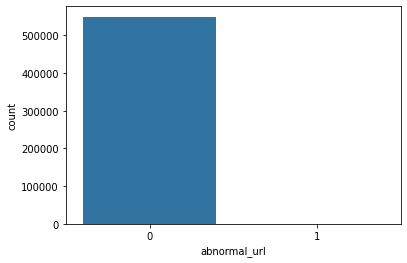

In [15]:
def abnormal_url(url):
    hostname = urlparse(url).hostname
    hostname = str(hostname)
    match = re.search(hostname, url)
    if match:
        # print match.group()
        return 1
    else:
        # print 'No matching pattern found'
        return 0
    

data['abnormal_url'] = data['URL'].apply(lambda i: abnormal_url(i))

sns.countplot(x='abnormal_url', data=data);

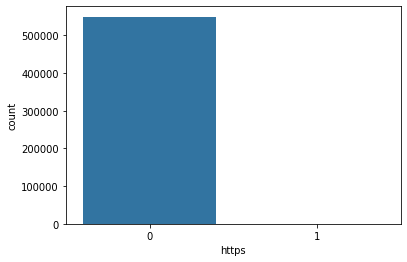

In [16]:
def httpSecure(url):
    htp = urlparse(url).scheme
    match = str(htp)
    if match=='https':
        # print match.group()
        return 1
    else:
        # print 'No matching pattern found'
        return 0
    

data['https'] = data['URL'].apply(lambda i: httpSecure(i))

sns.countplot(x='https', data=data);

## Counts the number of digit characters in a URL

In [17]:
def digit_count(url):
    digits = 0
    for i in url:
        if i.isnumeric():
            digits = digits + 1
    return digits

In [18]:
data['digits']= data['URL'].apply(lambda i: digit_count(i))

## Counts the number of letter characters in a URL

In [19]:
def letter_count(url):
    letters = 0
    for i in url:
        if i.isalpha():
            letters = letters + 1
    return letters

In [20]:
data['letters']= data['URL'].apply(lambda i: letter_count(i))

## Checks to see whether URL contains a shortening service

In [21]:
def Shortining_Service(url):
    match = re.search('bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|'
                      'yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|'
                      'short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|'
                      'doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|'
                      'db\.tt|qr\.ae|adf\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|'
                      'q\.gs|is\.gd|po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|'
                      'x\.co|prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|'
                      'tr\.im|link\.zip\.net',
                      url)
    if match:
        return 1
    else:
        return 0

In [22]:
data['Shortining_Service'] = data['URL'].apply(lambda x: Shortining_Service(x))

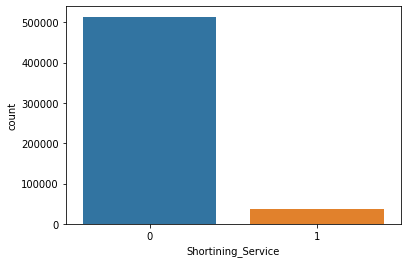

In [23]:
sns.countplot(x='Shortining_Service', data=data);

In [24]:
def having_ip_address(url):
    match = re.search(
        '(([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.'
        '([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\/)|'  # IPv4
        '(([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.'
        '([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\/)|'  # IPv4 with port
        '((0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\/)' # IPv4 in hexadecimal
        '(?:[a-fA-F0-9]{1,4}:){7}[a-fA-F0-9]{1,4}|'
        '([0-9]+(?:\.[0-9]+){3}:[0-9]+)|'
        '((?:(?:\d|[01]?\d\d|2[0-4]\d|25[0-5])\.){3}(?:25[0-5]|2[0-4]\d|[01]?\d\d|\d)(?:\/\d{1,2})?)', url)  # Ipv6
    if match:
        return 1
    else:
        return 0

In [25]:
data['having_ip_address'] = data['URL'].apply(lambda i: having_ip_address(i))

In [26]:
data['having_ip_address'].value_counts()

0    541153
1      8193
Name: having_ip_address, dtype: int64

<AxesSubplot:>

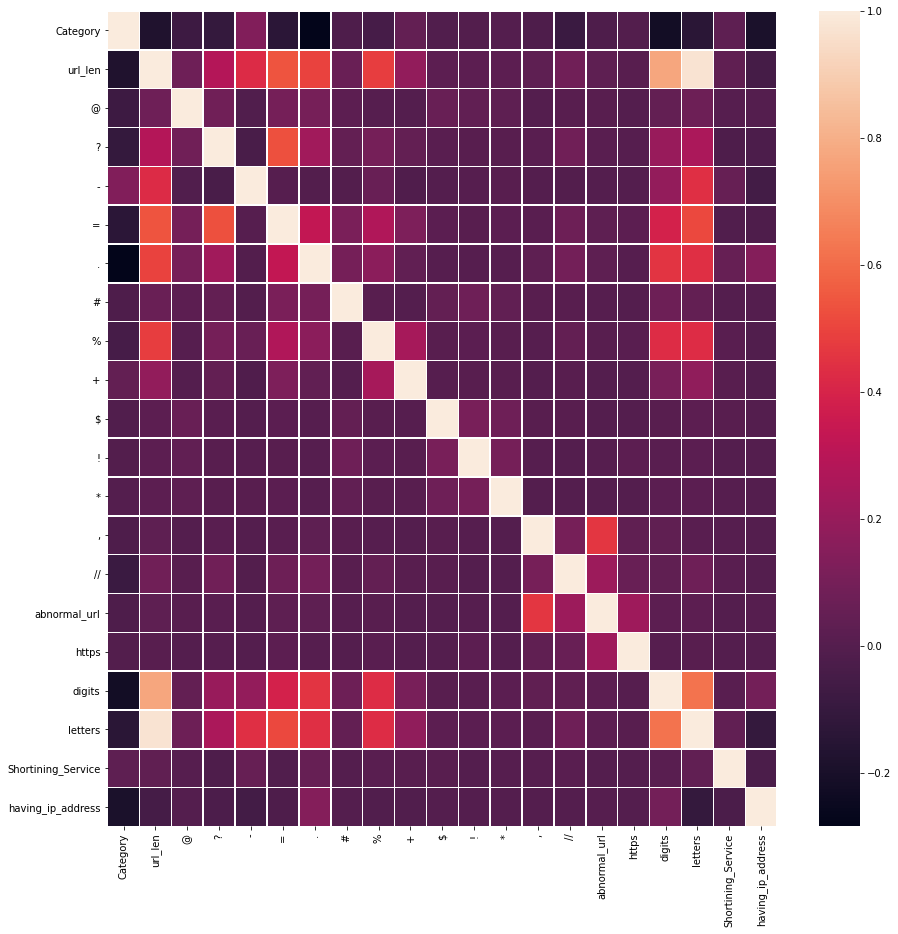

In [27]:
plt.figure(figsize=(15, 15))
sns.heatmap(data.corr(), linewidths=.5)

In [28]:
X = data.drop(['URL','Label','Category','domain'],axis=1)#,'type_code'
y = data['Category']

# Train & Test Split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [30]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import plot_roc_curve

#############################################
######-Model => <class 'sklearn.tree._classes.DecisionTreeClassifier'> 
Test Accuracy :  84.84%  
              Classification_report 
              precision    recall  f1-score   support

           0       0.81      0.61      0.70     31204
           1       0.86      0.94      0.90     78666

    accuracy                           0.85    109870
   macro avg       0.83      0.78      0.80    109870
weighted avg       0.84      0.85      0.84    109870

             Confusion_matrix 


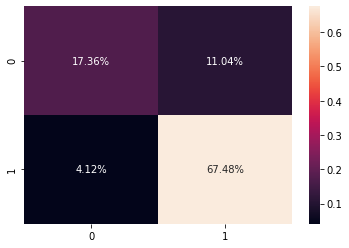

###################- End -###################
#############################################
######-Model => <class 'sklearn.neighbors._classification.KNeighborsClassifier'> 
Test Accuracy :  82.87%  
              Classification_report 
              precision    recall  f1-score   support

           0       0.74      0.61      0.67     31204
           1       0.85      0.92      0.88     78666

    accuracy                           0.83    109870
   macro avg       0.80      0.76      0.78    109870
weighted avg       0.82      0.83      0.82    109870

             Confusion_matrix 


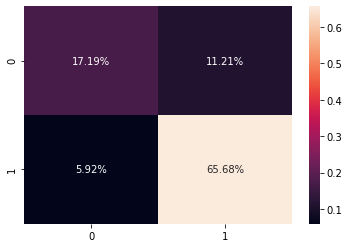

###################- End -###################
#############################################
######-Model => <class 'sklearn.linear_model._logistic.LogisticRegression'> 
Test Accuracy :  77.75%  
              Classification_report 
              precision    recall  f1-score   support

           0       0.83      0.27      0.41     31204
           1       0.77      0.98      0.86     78666

    accuracy                           0.78    109870
   macro avg       0.80      0.63      0.64    109870
weighted avg       0.79      0.78      0.73    109870

             Confusion_matrix 


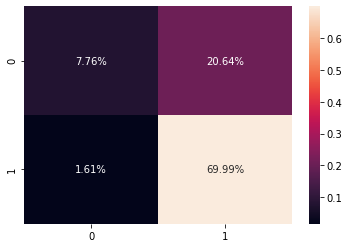

###################- End -###################


In [31]:
models = [DecisionTreeClassifier,KNeighborsClassifier,LogisticRegression]
accuracy_test=[]
for m in models:
    print('#############################################')
    print('######-Model =>\033[07m {} \033[0m'.format(m))
    if m == LogisticRegression:
        model_ = m(C=1.0, class_weight=None, dual=False, fit_intercept=True, intercept_scaling=1, 
                   max_iter=1000, multi_class='ovr', n_jobs=1, penalty='l1', random_state=None, 
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False)
    else:
        model_ = m()
    model_.fit(X_train, y_train)
    pred = model_.predict(X_test)
    acc = accuracy_score(pred, y_test)
    accuracy_test.append(acc)
    print('Test Accuracy :\033[32m \033[01m {:.2f}% \033[30m \033[0m'.format(acc*100))
    print('\033[01m              Classification_report \033[0m')
    print(classification_report(y_test, pred))
    print('\033[01m             Confusion_matrix \033[0m')
    cf_matrix = confusion_matrix(y_test, pred)
    plot_ = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True,fmt= '0.2%')
    plt.show()
    print('\033[31m###################- End -###################\033[0m')

# Final Report

In [32]:
output = pd.DataFrame({"Model":['Decision Tree Classifier','KNeighbors Classifier',
                                'Logistic Regression'],
                      "Accuracy":accuracy_test})

In [33]:
output

,Model,Accuracy
0,Decision Tree Classifier,0.848357
1,KNeighbors Classifier,0.828688
2,Logistic Regression,0.777492


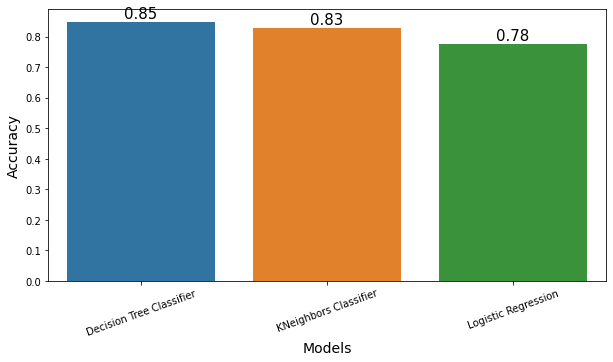

In [34]:
plt.figure(figsize=(10, 5))
plots = sns.barplot(x='Model', y='Accuracy', data=output)
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')

plt.xlabel("Models", size=14)
plt.xticks(rotation=20);
plt.ylabel("Accuracy", size=14)
plt.show()

In [35]:
data

,URL,Label,Category,url_len,domain,@,?,-,=,.,...,!,*,",",//,abnormal_url,https,digits,letters,Shortining_Service,having_ip_address
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad,0,225,nobell.it,0,1,4,4,6,...,0,0,0,0,0,0,58,135,0,0
1,dghjdgf.com/paypal.co.uk/cycgi-bin/webscrcmd=_...,bad,0,77,dghjdgf.com,0,0,2,2,4,...,0,0,0,0,0,0,1,62,0,0
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad,0,177,serviciosbys.com,0,0,1,0,7,...,0,0,0,0,0,0,47,111,0,0
3,mail.printakid.com/online.americanexpress.com/...,bad,0,56,mail.printakid.com,0,0,0,0,5,...,0,0,0,0,0,0,0,49,0,0
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad,0,116,thewhiskeydregs.com,0,1,1,0,1,...,0,0,0,1,0,0,21,82,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
549341,23.227.196.215/,bad,0,15,None,0,0,0,0,3,...,0,0,0,0,0,0,11,0,0,1
549342,apple-checker.org/,bad,0,18,apple-checker.org,0,0,1,0,1,...,0,0,0,0,0,0,0,15,0,0
549343,apple-iclods.org/,bad,0,17,apple-iclods.org,0,0,1,0,1,...,0,0,0,0,0,0,0,14,0,0
549344,apple-uptoday.org/,bad,0,18,apple-uptoday.org,0,0,1,0,1,...,0,0,0,0,0,0,0,15,0,0
